In [3]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from toy_example_new import *

In [5]:
#set-up parameters
T = 25
Lambda = 1
a = 1
b = 1
Y = Computation_Y_Exp(T, Lambda, a, b)

ended burn-in @ 19999: 0.009


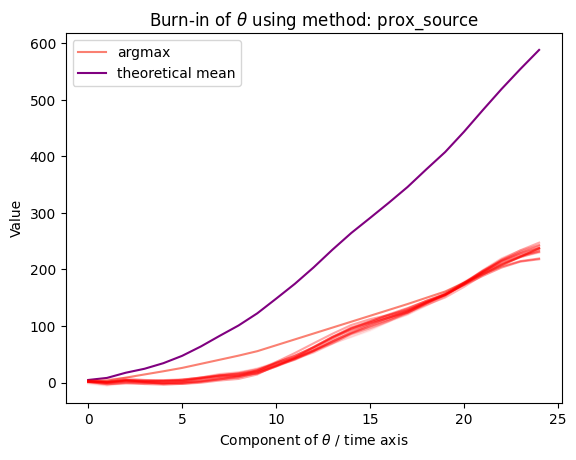

In [6]:
sim_prox_source, accepts_prox_source, gammas_prox_source, mean_prox_source, end_prox_source, fig_prox_source = MetropolisHastings(T, Lambda, Y, a, b, method="prox_source")

ended burn-in @ 17999: -0.006


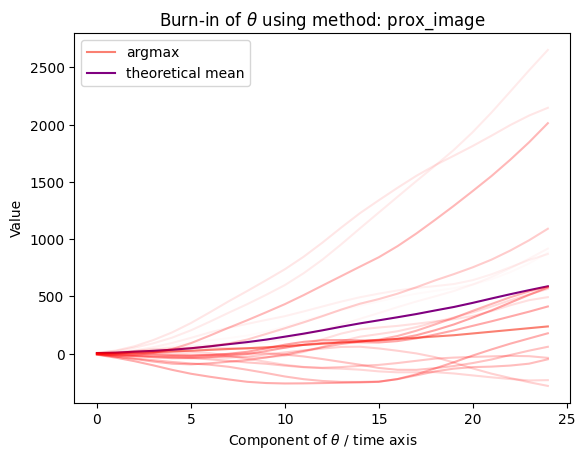

In [7]:
sim_prox_image, accepts_prox_image, gammas_prox_image, mean_prox_image, end_prox_image, fig_prox_image = MetropolisHastings(T, Lambda, Y, a, b, method="prox_image")

ended burn-in @ 22999: -0.001


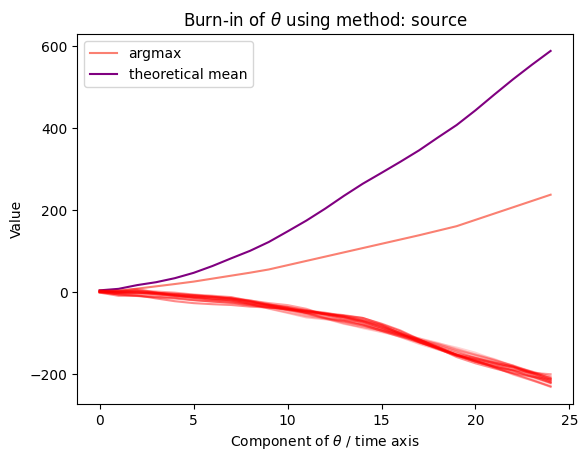

In [8]:
sim_source, accepts_source, gammas_source, mean_source, end_source, fig_source = MetropolisHastings(T, Lambda, Y, a, b, method="source")

ended burn-in @ 26999: -0.003


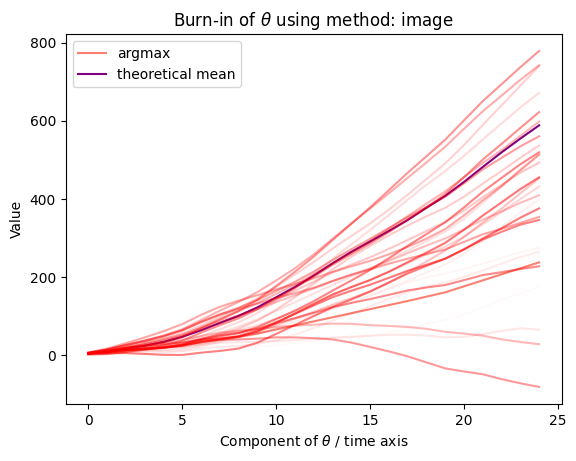

In [9]:
sim_image, accepts_image, gammas_image, mean_image, end_image, fig_image = MetropolisHastings(T, Lambda, Y, a, b, method="image")

ended burn-in @ 34999: 0.005


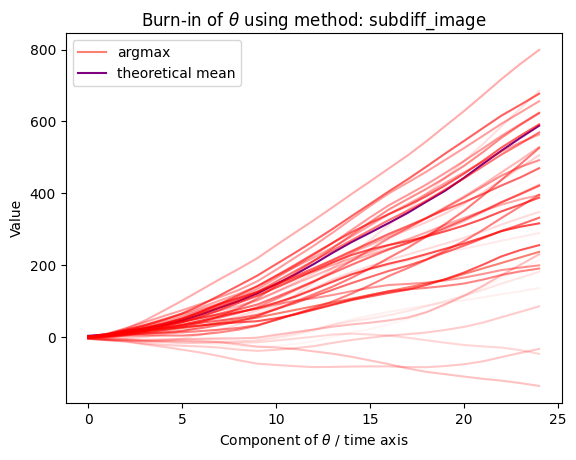

In [10]:
sim_subdiff_image, accepts_subdiff_image, gammas_subdiff_image, mean_subdiff_image, end_subdiff_image, fig_subdiff_image = MetropolisHastings(T, Lambda, Y, a, b, method="subdiff_image")

ended burn-in @ 20999: -0.006


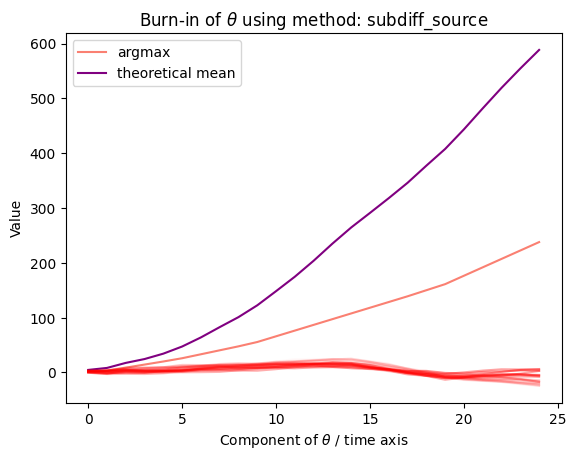

In [11]:
sim_subdiff_source, accepts_subdiff_source, gammas_subdiff_source, mean_subdiff_source, end_subdiff_source, fig_subdiff_source = MetropolisHastings(T, Lambda, Y, a, b, method="subdiff_source")

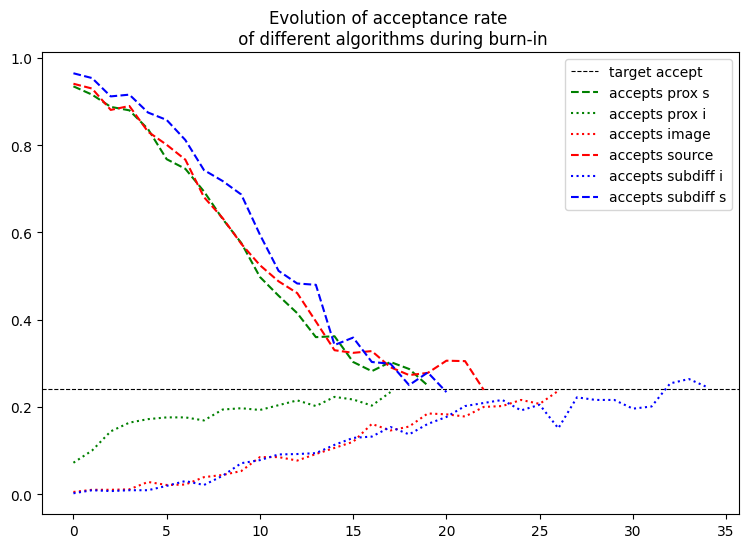

In [12]:
fig,ax = plt.subplots(1,1, figsize=(9,6))
ax.set_title("Evolution of acceptance rate \n of different algorithms during burn-in")
ax.axhline(0.24, label="target accept", color="black", linestyle="dashed", linewidth=0.8)
ax.plot(accepts_prox_source, label="accepts prox s", color="green", linestyle="dashed")
ax.plot(accepts_prox_image, label="accepts prox i", color="green", linestyle="dotted")
ax.plot(accepts_image, label= "accepts image", color="red", linestyle="dotted")
ax.plot(accepts_source, label="accepts source", color="red", linestyle="dashed")
ax.plot(accepts_subdiff_image, label="accepts subdiff i", color="blue", linestyle="dotted")
ax.plot(accepts_subdiff_source, label="accepts subdiff s", color="blue", linestyle="dashed")
ax.legend()

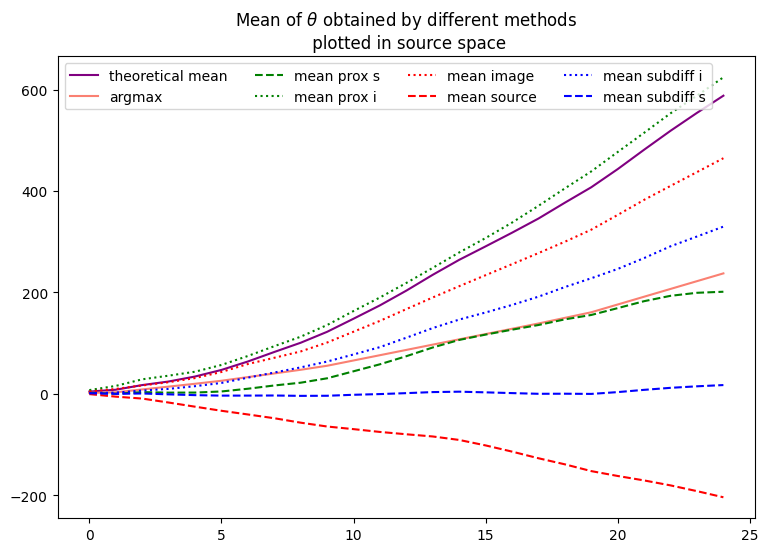

In [13]:
fig,ax = plt.subplots(1,1, figsize=(9,6))
mu, _ = ComputeMeans(T, Lambda, Y, a, b)
x,  _  = ComputeArgmax(T, Lambda, Y, a, b)

ax.set_title(r"Mean of $\theta$ obtained by different methods"+"\n plotted in source space")
ax.plot(mu, label="theoretical mean", color="purple", linestyle="solid")
ax.plot(x, label="argmax", color="salmon", linestyle="solid")
ax.plot(mean_prox_source, label="mean prox s", color="green", linestyle="dashed")
ax.plot(mean_prox_image, label="mean prox i", color="green", linestyle="dotted")
ax.plot(mean_image, label= "mean image", color="red", linestyle="dotted")
ax.plot(mean_source, label="mean source", color="red", linestyle="dashed")
ax.plot(mean_subdiff_image, label="mean subdiff i", color="blue", linestyle="dotted")
ax.plot(mean_subdiff_source, label="mean subdiff s", color="blue", linestyle="dashed")
ax.legend(ncols=4)

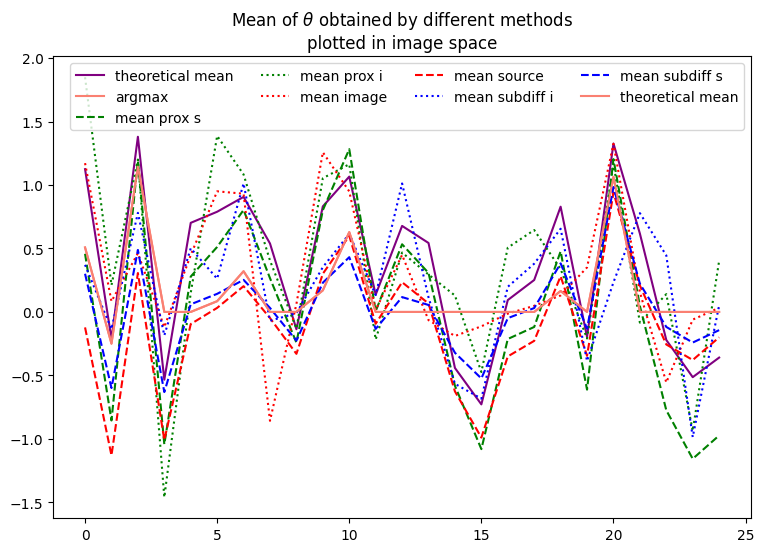

In [14]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
_, mu_tilde = ComputeMeans(T, Lambda, Y, a, b)
_, x_tilde  = ComputeArgmax(T, Lambda, Y, a, b)
D = BuildD(T)

ax.set_title(r"Mean of $\theta$ obtained by different methods"+"\nplotted in image space")
ax.plot(mu_tilde, label="theoretical mean", color="purple", linestyle="solid")
ax.plot(x_tilde, label="argmax", color="salmon", linestyle="solid")
ax.plot(D @ mean_prox_source, label="mean prox s", color="green", linestyle="dashed")
ax.plot(D @ mean_prox_image, label="mean prox i", color="green", linestyle="dotted")
ax.plot(D @ mean_image, label= "mean image", color="red", linestyle="dotted")
ax.plot(D @ mean_source, label="mean source", color="red", linestyle="dashed")
ax.plot(D @ mean_subdiff_image, label="mean subdiff i", color="blue", linestyle="dotted")
ax.plot(D @ mean_subdiff_source, label="mean subdiff s", color="blue", linestyle="dashed")
ax.plot(ComputeArgmax(T, Lambda, Y, a, b)[1], label="theoretical mean", color="salmon")
ax.legend(ncols=4)

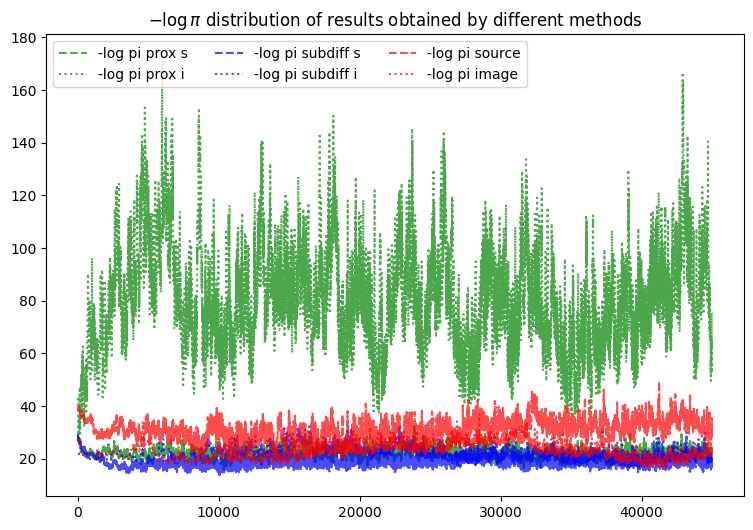

In [15]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T,a,b)
M = max([end_image,end_subdiff_image,end_prox_image,end_source,end_subdiff_source,end_prox_source])
M = int(M + 1e4)

ax.set_title(r"$-\log{\pi}$ distribution of results obtained by different methods")
ax.plot(-LogDistributionPi_Tab(sim_prox_source[:M], Y, A, D, sh, Lambda), color = "green", label = "-log pi prox s", linestyle="dashed", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_prox_image[:M], Y, A, D, sh, Lambda), color = "green", label = "-log pi prox i", linestyle="dotted", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_subdiff_source[:M], Y, A, D, sh, Lambda), color = "blue", label = "-log pi subdiff s", linestyle="dashed", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_subdiff_image[:M], Y, A, D, sh, Lambda), color = "blue", label = "-log pi subdiff i", linestyle="dotted", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_source[:M], Y, A, D, sh, Lambda), color = "red", label = "-log pi source", linestyle="dashed", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_image[:M], Y, A, D, sh, Lambda), color = "red", label = "-log pi image", linestyle="dotted", alpha=0.7)
ax.legend(ncols=3)

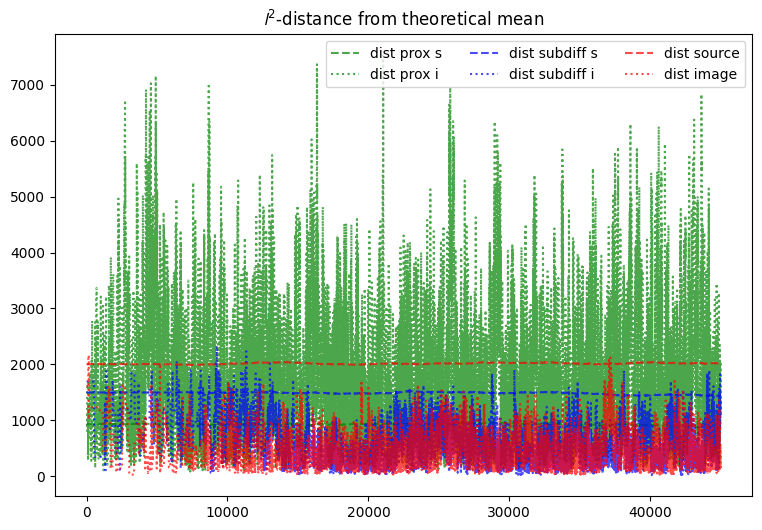

In [16]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
mu, _ = ComputeMeans(T, Lambda, Y, a, b)
M = max([end_image,end_subdiff_image,end_prox_image,end_source,end_subdiff_source,end_prox_source])
M = int(M + 1e4)

ax.set_title(r"$\mathcal{l}^2$-distance from theoretical mean")
ax.plot(npl.norm(sim_prox_source[:M]-mu, axis=1), color = "green", label = "dist prox s", linestyle="dashed", alpha=0.7)
ax.plot(npl.norm(sim_prox_image[:M]-mu, axis=1), color = "green", label = "dist prox i", linestyle="dotted", alpha=0.7)
ax.plot(npl.norm(sim_subdiff_source[:M]-mu, axis=1), color = "blue", label = "dist subdiff s", linestyle="dashed", alpha=0.7)
ax.plot(npl.norm(sim_subdiff_image[:M]-mu, axis=1), color = "blue", label = "dist subdiff i", linestyle="dotted", alpha=0.7)
ax.plot(npl.norm(sim_source[:M]-mu, axis=1), color = "red", label = "dist source", linestyle="dashed", alpha=0.7)
ax.plot(npl.norm(sim_image[:M]-mu, axis=1), color = "red", label = "dist image", linestyle="dotted", alpha=0.7)
ax.legend(ncols=3)

In [17]:
q = np.array([2.5,50,97.5])
quantiles_emp1 = Quantiles((D@sim_source.T).T, q, T)
quantiles_emp2 = Quantiles((D@sim_image.T).T, q, T)
quantiles_emp3 = Quantiles((D@sim_subdiff_source.T).T, q, T)
quantiles_emp4 = Quantiles((D@sim_subdiff_image.T).T, q, T)
quantiles_emp5 = Quantiles((D@sim_prox_source.T).T, q, T)
quantiles_emp6 = Quantiles((D@sim_prox_image.T).T, q, T)

Mean quality of .025 and .975 quantile estimation: 
Source         : 54.77%
Image          : 42.42%
Source Subdiff : 50.38%
Image Subdiff  : 45.79%
Prox Source    : 38.73%
Prox Image     : 171.90%


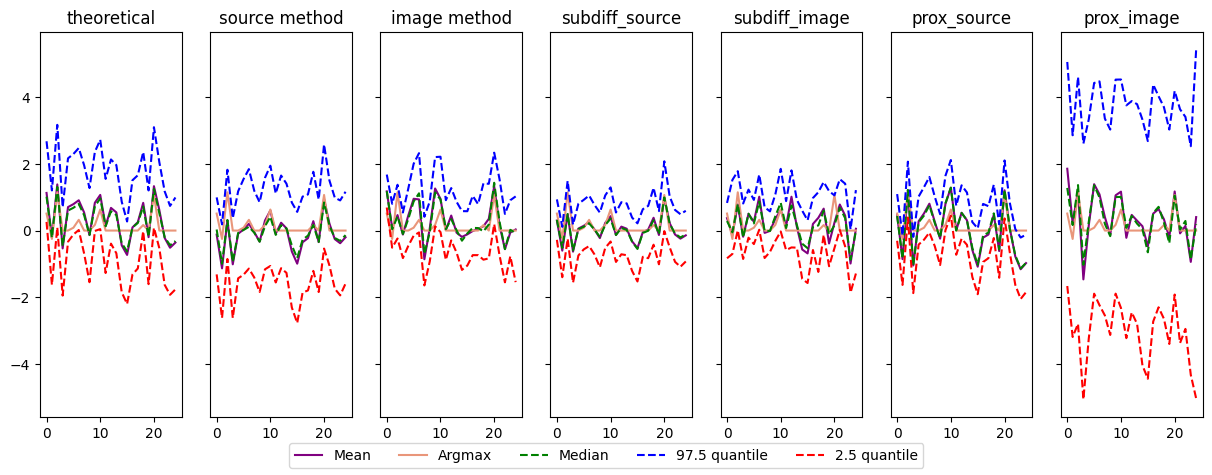

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5), sharey=True)
_,x_tilde = ComputeArgmax(T, Lambda, Y, a, b)
q1 = ComputeQuantiles(T, Lambda, 0.975*np.ones(T), Y, a, b)
q2 = ComputeQuantiles(T, Lambda, 0.025*np.ones(T), Y, a, b)
med = ComputeQuantiles(T, Lambda, 0.5*np.ones(T), Y, a, b)
*_,mu_tilde = ComputeMeans(T, Lambda, Y, a, b,)

#Plot of empirical results with method source
axes[0].plot(mu_tilde,color="purple",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("theoretical")
fig.legend(loc="lower center", ncols=5)

#Plot of empirical results with method source
axes[1].plot(D@mean_source,color="purple")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp1[1],'g--')
axes[1].plot(quantiles_emp1[2],'b--')
axes[1].plot(quantiles_emp1[0],'r--')
axes[1].set_title("source method")

#Plot of empirical results with method image
axes[2].plot(D@mean_image,color="purple")
axes[2].plot(x_tilde,color="darksalmon")
axes[2].plot(quantiles_emp2[1],'g--')
axes[2].plot(quantiles_emp2[2],'b--')
axes[2].plot(quantiles_emp2[0],'r--')
axes[2].set_title("image method")

#Plot of empirical results with method subdiff_source
axes[3].plot(D@mean_subdiff_source,color="purple")
axes[3].plot(x_tilde,color="darksalmon")
axes[3].plot(quantiles_emp3[1],'g--')
axes[3].plot(quantiles_emp3[2],'b--')
axes[3].plot(quantiles_emp3[0],'r--')
axes[3].set_title("subdiff_source")

#Plot of empirical results with method subdiff_image
axes[4].plot(D@mean_subdiff_image,color="purple")
axes[4].plot(x_tilde,color="darksalmon")
axes[4].plot(quantiles_emp4[1],'g--')
axes[4].plot(quantiles_emp4[2],'b--')
axes[4].plot(quantiles_emp4[0],'r--')
axes[4].set_title("subdiff_image")

#Plot of empirical results with method prox_source
axes[5].plot(D@mean_prox_source,color="purple")
axes[5].plot(x_tilde,color="darksalmon")
axes[5].plot(quantiles_emp5[1],'g--')
axes[5].plot(quantiles_emp5[2],'b--')
axes[5].plot(quantiles_emp5[0],'r--')
axes[5].set_title("prox_source")

#Plot of empirical results with method prox_image
axes[6].plot(D@mean_prox_image,color="purple")
axes[6].plot(x_tilde,color="darksalmon")
axes[6].plot(quantiles_emp6[1],'g--')
axes[6].plot(quantiles_emp6[2],'b--')
axes[6].plot(quantiles_emp6[0],'r--')
axes[6].set_title("prox_image")

quantile_quality_source = 0.5*np.sum(abs(quantiles_emp1[0] - q2))/(np.sum(abs(q2)))  + 0.5*np.sum(abs(quantiles_emp1[2] - q1))/np.sum(abs(q1))
quantile_quality_image = 0.5*np.sum(abs(quantiles_emp2[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp2[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_source = 0.5*np.sum(abs(quantiles_emp3[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp3[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_image = 0.5*np.sum(abs(quantiles_emp4[0] - q2))/np.sum(abs(q2)) + 0.5*np.sum(abs(quantiles_emp4[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_source = 0.5*np.sum(abs(quantiles_emp5[0] - q2))/np.sum(abs(q2))  + 0.5*np.sum(abs(quantiles_emp5[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_image = 0.5*np.sum(abs(quantiles_emp6[0] - q2))/np.sum(abs(q2)) + 0.5*np.sum(abs(quantiles_emp6[2] - q1))/np.sum(abs(q1))

print("Mean quality of .025 and .975 quantile estimation: ")

print(f"Source         : {quantile_quality_source:.2%}")
print(f"Image          : {quantile_quality_image:.2%}")
print(f"Source Subdiff : {quantile_quality_subdiff_source:.2%}")
print(f"Image Subdiff  : {quantile_quality_subdiff_image:.2%}")
print(f"Prox Source    : {quantile_quality_prox_source:.2%}")
print(f"Prox Image     : {quantile_quality_prox_image:.2%}")

In [19]:
sim_source, burn_in_source = PGdual_One_at_a_time(T, Lambda, Y, a, b)
sim_image,  burn_in_image  = PGdual_One_at_a_time(T, Lambda, Y, a, b, method="image")

C:\Users\vetle\OneDrive\Dokumenter\4MIC-S2\mcmc-epidemic\toy_example_new.py:449: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  candidate = npr.multivariate_normal(mu, np.diag(gamma) * D_1@D_1.T)


In [20]:
print(max(burn_in_source))
print(max(burn_in_image))

30999.0
9999.0


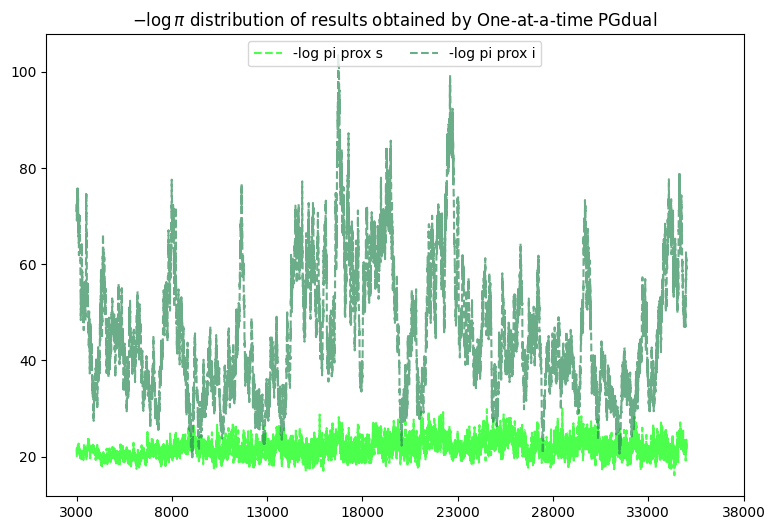

In [21]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.set_title(r"$-\log{\pi}$ distribution of results obtained by One-at-a-time PGdual")
ax.plot(-LogDistributionPi_Tab(sim_source[3000:35000], Y, A, D, sh, Lambda), color = "lime", label = "-log pi prox s", linestyle="dashed", alpha=0.7)
ax.plot(-LogDistributionPi_Tab(sim_image[3000:35000], Y, A, D, sh, Lambda), color = "seagreen", label = "-log pi prox i", linestyle="dashed", alpha=0.7)
ax.set_xticks(ax.get_xticks()[1:], labels = (ax.get_xticks()[1:]+3000).astype(int))
ax.legend(loc="upper center", ncols=2)